# ML - Project - ECG ARR - Eigen notebook



## Packages

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

## Data aquisition



Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Create pandas dataframe from csv files

In [ ]:
data_path = '/content/drive/MyDrive/ML_project/'
train_data = pd.read_csv(data_path + 'train_data.csv', header=None)
test_data = pd.read_csv(data_path + 'test_data.csv', header=None)
val_data = pd.read_csv(data_path + 'val_data.csv', header=None)
raw_data = pd.read_csv(data_path + 'beats_nsvfq_48p.csv')

In [ ]:
X_train = train_data.iloc[:, :-1].to_numpy()
y_train = train_data.iloc[:, -1].to_numpy()

X_test = test_data.iloc[:, :-1].to_numpy()
y_test = test_data.iloc[:, -1].to_numpy()

X_val = val_data.iloc[:, :-1].to_numpy()
y_val = val_data.iloc[:, -1].to_numpy()

In [ ]:
raw = raw_data.to_numpy()

In [ ]:
X_train.shape[0] / raw.shape[0]

0.5999945180948553

In [ ]:
X_val.shape[0] / raw.shape[0]

0.2000073092068597

In [ ]:
X_test.shape[0] / raw.shape[0]

0.2000073092068597

In [ ]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,-0.265,-0.265,-0.290,-0.310,-0.325,-0.315,-0.295,-0.280,-0.285,-0.280,...,-0.170,-0.145,-0.155,-0.170,-0.180,-0.185,-0.190,-0.190,-0.200,0.0
1,-0.110,-0.110,-0.105,-0.095,-0.080,-0.050,-0.050,-0.050,-0.050,-0.040,...,-0.315,-0.285,-0.275,-0.265,-0.260,-0.275,-0.290,-0.280,-0.275,12.0
2,-0.380,-0.380,-0.400,-0.415,-0.395,-0.380,-0.380,-0.395,-0.390,-0.415,...,-0.390,-0.410,-0.445,-0.435,-0.420,-0.415,-0.400,-0.410,-0.425,0.0
3,-0.955,-0.945,-0.960,-0.960,-0.970,-0.970,-0.955,-0.935,-0.940,-0.920,...,-0.995,-1.000,-1.010,-1.040,-1.040,-1.025,-1.020,-1.000,-0.990,0.0
4,0.030,0.030,0.055,0.060,0.040,0.030,0.035,0.040,0.060,0.050,...,-0.010,0.000,-0.005,-0.025,-0.015,-0.020,-0.015,0.010,0.005,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65665,-0.035,-0.015,0.005,0.000,0.000,-0.005,-0.015,-0.025,-0.040,-0.050,...,-0.065,-0.045,-0.050,-0.060,-0.075,-0.080,-0.070,-0.060,-0.090,2.0
65666,-0.245,-0.245,-0.250,-0.235,-0.235,-0.255,-0.260,-0.270,-0.255,-0.235,...,-0.360,-0.370,-0.355,-0.370,-0.380,-0.390,-0.395,-0.380,-0.380,13.0
65667,-0.375,-0.390,-0.400,-0.400,-0.370,-0.370,-0.375,-0.385,-0.385,-0.380,...,-0.410,-0.395,-0.375,-0.370,-0.380,-0.375,-0.390,-0.395,-0.385,0.0
65668,-0.630,-0.640,-0.655,-0.640,-0.625,-0.605,-0.585,-0.585,-0.585,-0.585,...,-0.730,-0.730,-0.745,-0.755,-0.740,-0.730,-0.715,-0.710,-0.715,3.0


In [ ]:
X_train.shape

(65670, 250)

In [ ]:
y_train

array([ 0., 12.,  0., ...,  0.,  3.,  0.])

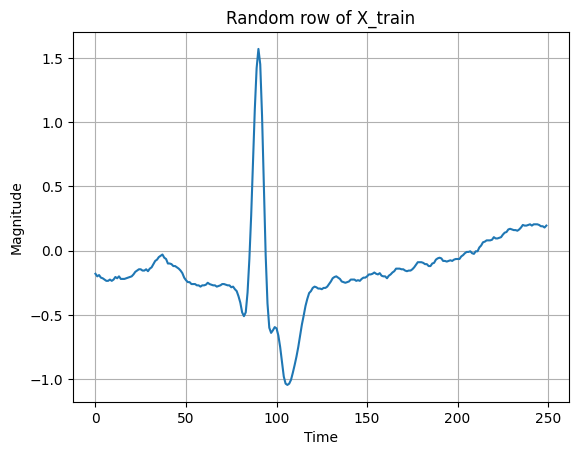

In [ ]:
# Assuming X_train is a NumPy array or Pandas DataFrame
first_row = X_train[104, :]  # Extract the first row

# Plot the first row
plt.plot(first_row)
plt.title('Random row of X_train')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

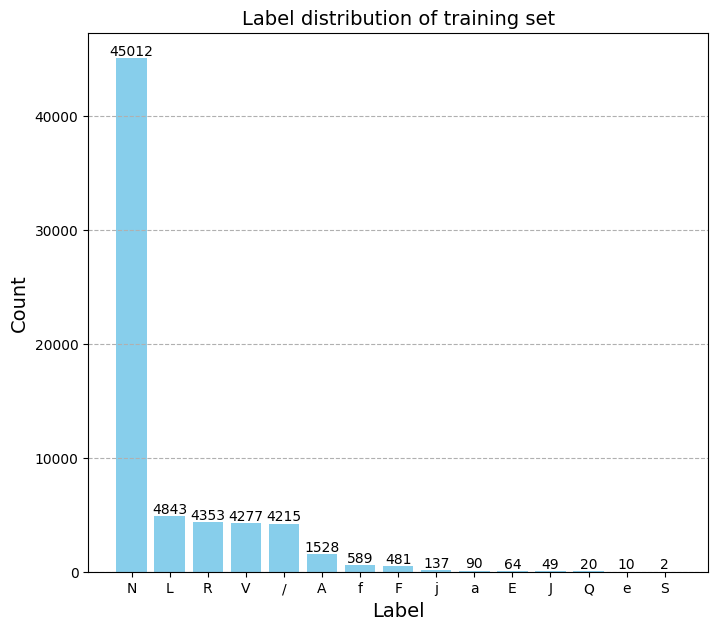

In [ ]:
from collections import Counter

# Count occurrences of each label
label_counts = Counter(y_train)

# Extract the labels and their counts
unique_labels = list(label_counts.keys())
counts = list(label_counts.values())
num_to_class = {0: 'N', 1: '/', 2: 'L', 3: 'R', 4: 'e', 5: 'j', 6: 'A', 7: 'a',
                 8: 'J', 9: 'S', 10: 'E', 11: 'F', 12: 'V', 13: 'f', 14: 'Q'}
unique_labels_letters = [num_to_class.get(num, num) for num in unique_labels]

# Descending order
sorted_indices = np.argsort(counts)[::-1]  # Get indices of sorted values in descending order
unique_labels_letters = [unique_labels_letters[i] for i in sorted_indices]
counts = [counts[i] for i in sorted_indices]

# Create the bar plot
plt.figure(figsize=(8, 7))
bars = plt.bar(unique_labels_letters, counts, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
             ha='center', va='bottom')

# Set the x-axis labels to letters
plt.xticks(ticks=range(len(unique_labels)))

plt.title('Label distribution of training set', fontsize=14)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--')

# Display the plot
plt.show()


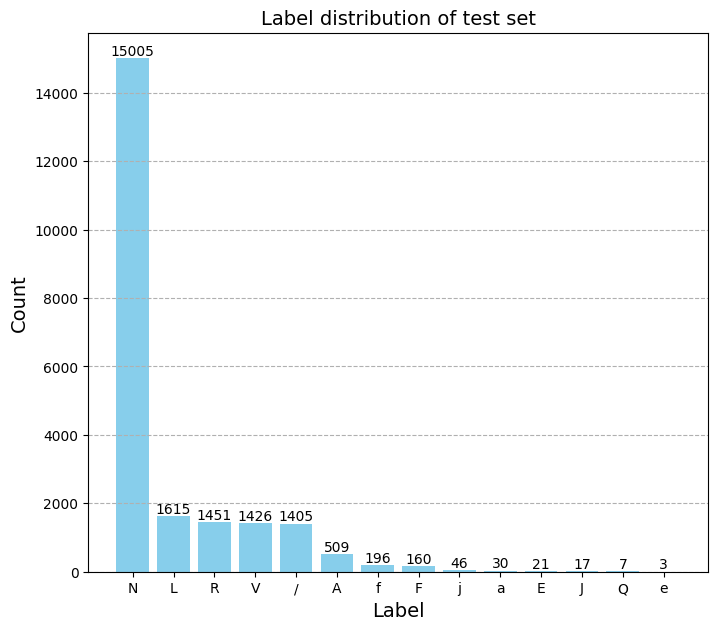

In [ ]:
# Count occurrences of each label
label_counts = Counter(y_test)

# Extract the labels and their counts
unique_labels = list(label_counts.keys())
counts = list(label_counts.values())
num_to_class = {0: 'N', 1: '/', 2: 'L', 3: 'R', 4: 'e', 5: 'j', 6: 'A', 7: 'a',
                 8: 'J', 9: 'S', 10: 'E', 11: 'F', 12: 'V', 13: 'f', 14: 'Q'}
unique_labels_letters = [num_to_class.get(num, num) for num in unique_labels]

# Descending order
sorted_indices = np.argsort(counts)[::-1]  # Get indices of sorted values in descending order
unique_labels_letters = [unique_labels_letters[i] for i in sorted_indices]
counts = [counts[i] for i in sorted_indices]

# Create the bar plot
plt.figure(figsize=(8, 7))
bars = plt.bar(unique_labels_letters, counts, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
             ha='center', va='bottom')

# Set the x-axis labels to letters
plt.xticks(ticks=range(len(unique_labels)))

plt.title('Label distribution of test set', fontsize=14)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--')

# Display the plot
plt.show()

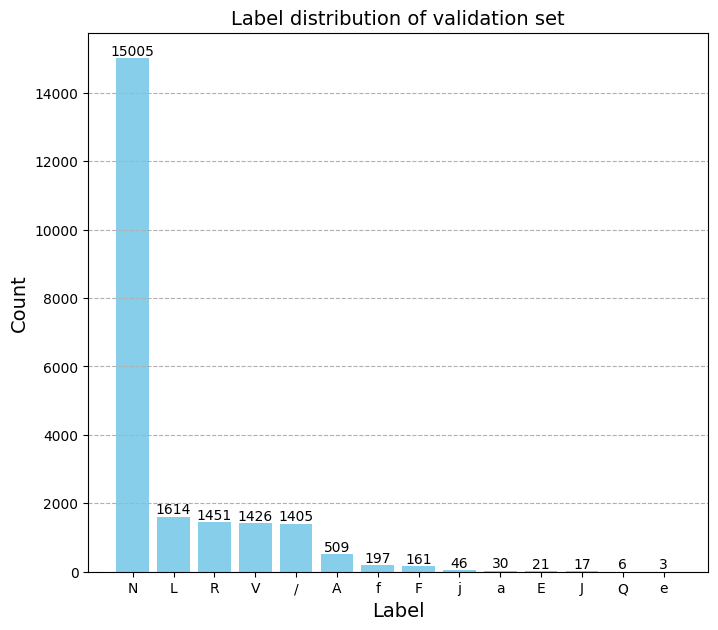

In [ ]:
# Count occurrences of each label
label_counts = Counter(y_val)

# Extract the labels and their counts
unique_labels = list(label_counts.keys())
counts = list(label_counts.values())
num_to_class = {0: 'N', 1: '/', 2: 'L', 3: 'R', 4: 'e', 5: 'j', 6: 'A', 7: 'a',
                 8: 'J', 9: 'S', 10: 'E', 11: 'F', 12: 'V', 13: 'f', 14: 'Q'}
unique_labels_letters = [num_to_class.get(num, num) for num in unique_labels]

# Descending order
sorted_indices = np.argsort(counts)[::-1]  # Get indices of sorted values in descending order
unique_labels_letters = [unique_labels_letters[i] for i in sorted_indices]
counts = [counts[i] for i in sorted_indices]

# Create the bar plot
plt.figure(figsize=(8, 7))
bars = plt.bar(unique_labels_letters, counts, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
             ha='center', va='bottom')

# Set the x-axis labels to letters
plt.xticks(ticks=range(len(unique_labels)))

plt.title('Label distribution of validation set', fontsize=14)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--')

# Display the plot
plt.show()

## Step 2


# Throwing away samples that have too few samples... only class S

Filtered Training Set:
(65668, 250) (65668,)

Filtered Validation Set:
(21891, 250) (21891,)

Filtered Test Set:
(21891, 250) (21891,)


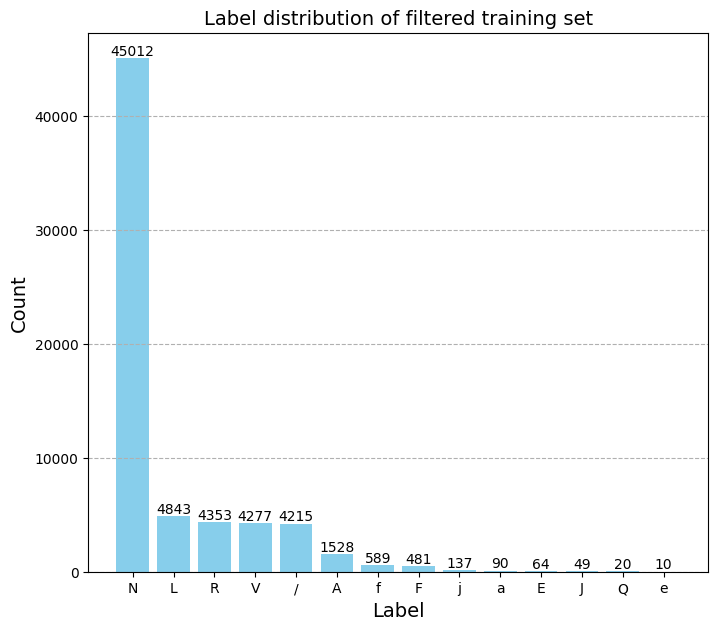

In [ ]:
# Concatenate y arrays to count occurrences
combined_classes = np.concatenate((y_train, y_val, y_test))

# Set minimum occurrences threshold
min_occurrences = 10

# Count occurrences of each class
unique_classes, counts = np.unique(combined_classes, return_counts=True)

# Determine classes to keep
classes_to_keep = unique_classes[counts >= min_occurrences]

# Filter each dataset based on classes to keep
train_filter = np.isin(y_train, classes_to_keep)
val_filter = np.isin(y_val, classes_to_keep)
test_filter = np.isin(y_test, classes_to_keep)

X_train_filtered = X_train[train_filter]
y_train_filtered = y_train[train_filter]

X_val_filtered = X_val[val_filter]
y_val_filtered = y_val[val_filter]

X_test_filtered = X_test[test_filter]
y_test_filtered = y_test[test_filter]

# Print results
print("Filtered Training Set:")
print(X_train_filtered.shape, y_train_filtered.shape)

print("\nFiltered Validation Set:")
print(X_val_filtered.shape, y_val_filtered.shape)

print("\nFiltered Test Set:")
print(X_test_filtered.shape, y_test_filtered.shape)


# Count occurrences of each label
label_counts = Counter(y_train_filtered)

# Extract the labels and their counts
unique_labels = list(label_counts.keys())
counts = list(label_counts.values())
num_to_class = {0: 'N', 1: '/', 2: 'L', 3: 'R', 4: 'e', 5: 'j', 6: 'A', 7: 'a',
                 8: 'J', 9: 'S', 10: 'E', 11: 'F', 12: 'V', 13: 'f', 14: 'Q'}
unique_labels_letters = [num_to_class.get(num, num) for num in unique_labels]

# Descending order
sorted_indices = np.argsort(counts)[::-1]  # Get indices of sorted values in descending order
unique_labels_letters = [unique_labels_letters[i] for i in sorted_indices]
counts = [counts[i] for i in sorted_indices]

# Create the bar plot
plt.figure(figsize=(8, 7))
bars = plt.bar(unique_labels_letters, counts, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
             ha='center', va='bottom')

# Set the x-axis labels to letters
plt.xticks(ticks=range(len(unique_labels)))

plt.title('Label distribution of filtered training set', fontsize=14)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--')

# Display the plot
plt.show()


In [ ]:
X_train = X_train[train_filter]
y_train = y_train[train_filter]

X_val = X_val[val_filter]
y_val = y_val[val_filter]

X_test = X_test[test_filter]
y_test = y_test[test_filter]


In [ ]:
# compute scaling with train and transform val and test with train scaler
# to ensure no influence of test/val data on the training of the model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

n_components = 8
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)

X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(X_train_pca.shape)
print(y_train.shape)

(65668, 8)
(65668,)


## Random Forest

In [ ]:
from tqdm import tqdm

rf_train = False

if rf_train:
  # Hyperparameter combinations to try
  n_estimators_list = [50, 100, 200]
  max_depth_list = [None, 10, 20]
  min_samples_split_list = [2, 5]
  min_samples_leaf_list = [1, 2]

  # Store the best model and its score
  best_model = None
  best_accuracy = 0
  best_params = {}

  # Loop through combinations of hyperparameters
  for n_estimators in n_estimators_list:
      for max_depth in max_depth_list:
          for min_samples_split in min_samples_split_list:
              for min_samples_leaf in min_samples_leaf_list:
                  # Create and fit the Random Forest classifier
                  rf = RandomForestClassifier(n_estimators=n_estimators,
                                              max_depth=max_depth,
                                              min_samples_split=min_samples_split,
                                              min_samples_leaf=min_samples_leaf,
                                              random_state=42)
                  # rf = RandomForestClassifier(n_estimators=n_estimators,
                  #           max_depth=max_depth,
                  #           min_samples_split=min_samples_split,
                  #           min_samples_leaf=min_samples_leaf,
                  #           random_state=42,
                  #           class_weight='balanced')
                  rf.fit(X_train_pca, y_train)

                  # Evaluate on validation set
                  y_val_pred = rf.predict(X_val_pca)
                  accuracy = accuracy_score(y_val, y_val_pred)
                  print(f"Evaluating with n_estimators={n_estimators}, max_depth={max_depth}, "
                        f"min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}")
                  print(f"Validation Accuracy: {accuracy:.4f}\n")

                  # Check if this is the best model
                  if accuracy > best_accuracy:
                      best_accuracy = accuracy
                      best_model = rf
                      best_params = {
                          'n_estimators': n_estimators,
                          'max_depth': max_depth,
                          'min_samples_split': min_samples_split,
                          'min_samples_leaf': min_samples_leaf
                      }

  # Evaluate the best model on the test set
  y_test_pred = best_model.predict(X_test_pca)
  print("\nBest Hyperparameters:", best_params)
  print("Test Set Classification Report:")
  print(classification_report(y_test, y_test_pred))
  print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Evaluating with n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=1
Validation Accuracy: 0.9700

Evaluating with n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=2
Validation Accuracy: 0.9688

Evaluating with n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=1
Validation Accuracy: 0.9695

Evaluating with n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=2
Validation Accuracy: 0.9686

Evaluating with n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=1
Validation Accuracy: 0.9405

Evaluating with n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=2
Validation Accuracy: 0.9406

Evaluating with n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=1
Validation Accuracy: 0.9389

Evaluating with n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=2
Validation Accuracy: 0.9380

Evaluating with n_estimators=50, max_depth=20, min_samples_split

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Best hyperparameters for rf
best_params_rf = {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}

rf = RandomForestClassifier(n_estimators=best_params_rf['n_estimators'],
                            max_depth=best_params_rf['max_depth'],
                            min_samples_split=best_params_rf['min_samples_split'],
                            min_samples_leaf=best_params_rf['min_samples_leaf'],
                            random_state=42,
                            class_weight=None) # Class weight -> take care of unbalanced
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_test_pred = rf.predict(X_test)
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
# Create and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# convert to letters
num_to_class = {0: 'N', 1: '/', 2: 'L', 3: 'R', 4: 'e', 5: 'j', 6: 'A', 7: 'a',
                 8: 'J', 9: 'S', 10: 'E', 11: 'F', 12: 'V', 13: 'f', 14: 'Q'}
y_test_letters = [num_to_class.get(num, num) for num in np.unique(y_test)]

plt.figure(figsize=(10, 8))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_test_letters, yticklabels=y_test_letters)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

NameError: name 'rf' is not defined

In [ ]:
np.unique(y_test)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 10., 11., 12., 13.,
       14.])

In [ ]:
y_test_letters

['N', '/', 'L', 'R', 'e', 'j', 'A', 'a', 'J', 'E', 'F', 'V', 'f', 'Q']

## Step 4

# MLP

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Hyperparameters
input_size = X_train_scaled.shape[1]  # Number of features
hidden_size = 64  # Number of neurons in the hidden layer
num_classes = 15  # Number of classes in multi-class classification
learning_rate = 0.001
num_epochs = 20
batch_size = 32

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_train, dtype=torch.long)

X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# Dataset and train/validation split
train_dataset = TensorDataset(X_tensor, y_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define the MLP model with a hidden layer and ReLU activation
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # Hidden layer
        self.relu = nn.ReLU()  # ReLU activation function
        self.fc2 = nn.Linear(hidden_size, num_classes)  # Output layer

    def forward(self, x):
        out = self.fc1(x)  # Apply the first layer
        out = self.relu(out)  # Apply ReLU activation
        out = self.fc2(out)  # Apply the output layer
        return out

# Initialize model, loss function, and optimizer
model = SimpleMLP(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for data, targets in train_loader:
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, targets in val_loader:
            outputs = model(data)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)  # Get class with max score
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    accuracy = 100 * correct / total
    print(f'Validation Loss: {val_loss/len(val_loader):.4f}, Accuracy: {accuracy:.2f}%')

print("Training Complete.")


Epoch [1/20], Loss: 0.3487
Validation Loss: 0.1869, Accuracy: 96.13%
Epoch [2/20], Loss: 0.1614
Validation Loss: 0.1534, Accuracy: 96.56%
Epoch [3/20], Loss: 0.1376
Validation Loss: 0.1331, Accuracy: 97.09%
Epoch [4/20], Loss: 0.1249
Validation Loss: 0.1257, Accuracy: 97.21%
Epoch [5/20], Loss: 0.1172
Validation Loss: 0.2051, Accuracy: 95.94%
Epoch [6/20], Loss: 0.1061
Validation Loss: 0.1126, Accuracy: 97.63%
Epoch [7/20], Loss: 0.1006
Validation Loss: 0.1131, Accuracy: 97.63%
Epoch [8/20], Loss: 0.0998
Validation Loss: 0.1162, Accuracy: 97.38%
Epoch [9/20], Loss: 0.0936
Validation Loss: 0.1028, Accuracy: 97.89%
Epoch [10/20], Loss: 0.0918
Validation Loss: 0.1024, Accuracy: 97.93%
Epoch [11/20], Loss: 0.0896
Validation Loss: 0.1115, Accuracy: 97.65%


KeyboardInterrupt: 

Test Loss: 0.0965, Test Accuracy: 97.99%
Precision: 0.9788
Recall: 0.9799
F1 Score: 0.9791


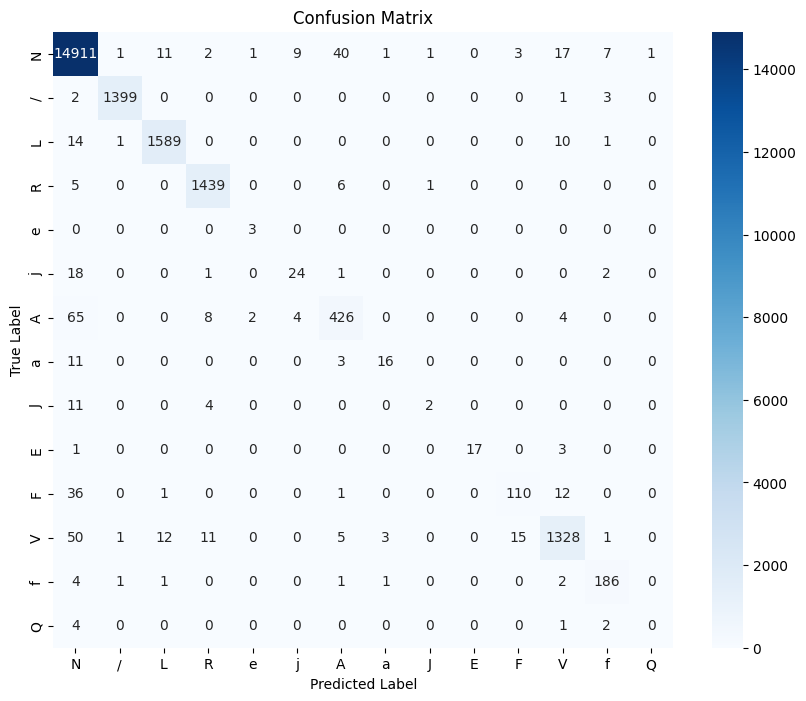

Hyperparameters:
Input Size: 250
Hidden Layer Size: 64
Number of Output Classes: 15
Learning Rate: 0.001
Number of Epochs: 20
Batch Size: 32
Total number of parameters in the model: 17039

Optimizer Parameters:
Learning Rate: 0.001


In [ ]:
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Test the model on the test set
model.eval()
test_loss = 0.0
correct = 0
total = 0
predicted_list = np.array([])
with torch.no_grad():
    for data, targets in test_loader:
        outputs = model(data)
        loss = criterion(outputs, targets)
        test_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)  # Get class with max score
        predicted_list = np.append(predicted_list, predicted.numpy())
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Loss: {test_loss/len(test_loader):.4f}, Test Accuracy: {test_accuracy:.2f}%')

# Convert predictions and true labels back to NumPy arrays
y_test_np = y_test_tensor.numpy()

# Compute Precision, Recall, F1 Score, and Confusion Matrix
precision = precision_score(y_test_np, predicted_list, average='weighted')
recall = recall_score(y_test_np, predicted_list, average='weighted')
f1 = f1_score(y_test_np, predicted_list, average='weighted')

# Print evaluation metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(y_test, y_test_pred))

# Create and display the confusion matrix
conf_matrix = confusion_matrix(y_test_np, predicted_list)

# convert to letters
num_to_class = {0: 'N', 1: '/', 2: 'L', 3: 'R', 4: 'e', 5: 'j', 6: 'A', 7: 'a',
                 8: 'J', 9: 'S', 10: 'E', 11: 'F', 12: 'V', 13: 'f', 14: 'Q'}
y_test_letters = [num_to_class.get(num, num) for num in np.unique(y_test_np)]

plt.figure(figsize=(10, 8))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_test_letters, yticklabels=y_test_letters)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print Hyperparameters
print("Hyperparameters:")
print(f"Input Size: {input_size}")
print(f"Hidden Layer Size: {hidden_size}")
print(f"Number of Output Classes: {num_classes}")
print(f"Learning Rate: {learning_rate}")
print(f"Number of Epochs: {num_epochs}")
print(f"Batch Size: {batch_size}")

# Calculate total number of parameters
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

# Print the total number of parameters
print(f"Total number of parameters in the model: {total_params}")

# Print Optimizer Parameters
print("\nOptimizer Parameters:")
for param_group in optimizer.param_groups:
    print(f"Learning Rate: {param_group['lr']}")

array([ 0., 13.,  0., ...,  3.,  3.,  0.])

# MLP on filtered dataset

In [ ]:
len(np.unique(y_train_filtered))

9

werkt niet want classes is niet van 1 t/m 9

In [ ]:
from sklearn.preprocessing import LabelEncoder

scaler = StandardScaler()
X_train_filtered_scaled = scaler.fit_transform(X_train_filtered)
X_val_filtered_scaled = scaler.transform(X_val_filtered)
X_test_filtered_scaled = scaler.transform(X_test_filtered)

# Hyperparameters
input_size = X_train_filtered_scaled.shape[1]  # Number of features
hidden_size = 64  # Number of neurons in the hidden layer
num_classes = len(np.unique(y_train_filtered))  # Number of classes in multi-class classification
learning_rate = 0.001
num_epochs = 20
batch_size = 32

# order classes from 1 to n
le = LabelEncoder()
y_train_filtered_ordered = le.fit_transform(y_train_filtered)
le_2 = LabelEncoder()
y_val_filtered_ordered = le_2.fit_transform(y_val_filtered)
# Mapping of original to new labels
print("Mapping (Original -> New):")
for original, new in zip(le.classes_, range(len(le.classes_))):
    print(f"{original} -> {new}")

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_train_filtered_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_train_filtered_ordered, dtype=torch.long)

X_val_tensor = torch.tensor(X_val_filtered_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_filtered_ordered, dtype=torch.long)

# Dataset and train/validation split
train_dataset = TensorDataset(X_tensor, y_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define the MLP model with a hidden layer and ReLU activation
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # Hidden layer
        self.relu = nn.ReLU()  # ReLU activation function
        self.fc2 = nn.Linear(hidden_size, num_classes)  # Output layer

    def forward(self, x):
        out = self.fc1(x)  # Apply the first layer
        out = self.relu(out)  # Apply ReLU activation
        out = self.fc2(out)  # Apply the output layer
        return out

# Initialize model, loss function, and optimizer
model = SimpleMLP(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for data, targets in train_loader:
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, targets in val_loader:
            outputs = model(data)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)  # Get class with max score
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    accuracy = 100 * correct / total
    print(f'Validation Loss: {val_loss/len(val_loader):.4f}, Accuracy: {accuracy:.2f}%')

print("Training Complete.")


Mapping (Original -> New):
0.0 -> 0
1.0 -> 1
2.0 -> 2
3.0 -> 3
4.0 -> 4
5.0 -> 5
6.0 -> 6
7.0 -> 7
8.0 -> 8
10.0 -> 9
11.0 -> 10
12.0 -> 11
13.0 -> 12
14.0 -> 13
Epoch [1/20], Loss: 0.3484
Validation Loss: 0.1960, Accuracy: 95.56%
Epoch [2/20], Loss: 0.1662
Validation Loss: 0.1491, Accuracy: 96.78%
Epoch [3/20], Loss: 0.1373
Validation Loss: 0.1331, Accuracy: 97.01%
Epoch [4/20], Loss: 0.1227
Validation Loss: 0.1244, Accuracy: 97.29%
Epoch [5/20], Loss: 0.1145
Validation Loss: 0.1229, Accuracy: 97.37%
Epoch [6/20], Loss: 0.1108
Validation Loss: 0.1216, Accuracy: 97.30%
Epoch [7/20], Loss: 0.1021
Validation Loss: 0.1163, Accuracy: 97.41%
Epoch [8/20], Loss: 0.0958
Validation Loss: 0.1238, Accuracy: 97.44%
Epoch [9/20], Loss: 0.0947
Validation Loss: 0.1165, Accuracy: 97.60%
Epoch [10/20], Loss: 0.0920
Validation Loss: 0.0988, Accuracy: 97.87%
Epoch [11/20], Loss: 0.0894
Validation Loss: 0.1008, Accuracy: 97.89%
Epoch [12/20], Loss: 0.0861
Validation Loss: 0.1040, Accuracy: 97.78%
Epoch [

Test Loss: 0.0964, Test Accuracy: 98.05%
Precision: 0.9795
Recall: 0.9805
F1 Score: 0.9796
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     15005
         1.0       1.00      1.00      1.00      1405
         2.0       0.99      0.98      0.99      1615
         3.0       0.99      1.00      0.99      1451
         4.0       0.25      0.33      0.29         3
         5.0       0.63      0.48      0.54        46
         6.0       0.93      0.82      0.87       509
         7.0       0.75      0.60      0.67        30
         8.0       0.70      0.41      0.52        17
        10.0       0.90      0.86      0.88        21
        11.0       0.89      0.62      0.73       160
        12.0       0.95      0.94      0.95      1426
        13.0       0.94      0.92      0.93       196
        14.0       0.00      0.00      0.00         7

    accuracy                           0.98     21891
   macro avg       0.78      0.71      0.74

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

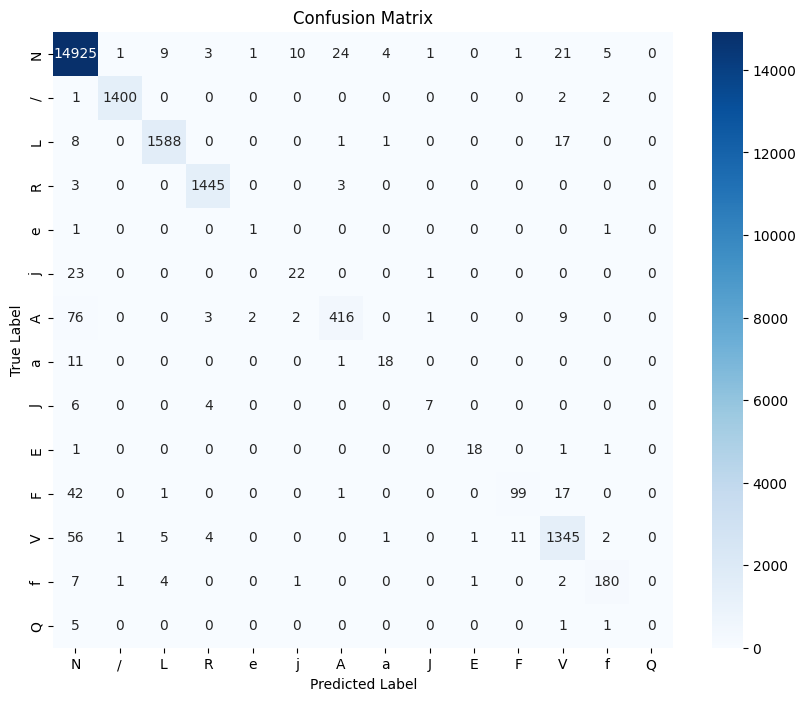

Hyperparameters:
Input Size: 250
Hidden Layer Size: 64
Number of Output Classes: 14
Learning Rate: 0.001
Number of Epochs: 20
Batch Size: 32
Total number of parameters in the model: 16974

Optimizer Parameters:
Learning Rate: 0.001


In [ ]:
le_3 = LabelEncoder()
y_test_filtered_ordered = le_3.fit_transform(y_test_filtered)

X_test_tensor = torch.tensor(X_test_filtered_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_filtered_ordered, dtype=torch.long)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Test the model on the test set
model.eval()
test_loss = 0.0
correct = 0
total = 0
predicted_list = np.array([])
with torch.no_grad():
    for data, targets in test_loader:
        outputs = model(data)
        loss = criterion(outputs, targets)
        test_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)  # Get class with max score
        predicted_list = np.append(predicted_list, predicted.numpy())
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Loss: {test_loss/len(test_loader):.4f}, Test Accuracy: {test_accuracy:.2f}%')

# Convert predictions and true labels back to NumPy arrays
y_test_np = y_test_tensor.numpy()

# Map back labelencodings
y_test_np = le.inverse_transform(y_test_np)
predicted_list = le.inverse_transform(predicted_list.astype(int))

# Compute Precision, Recall, F1 Score, and Confusion Matrix
precision = precision_score(y_test_np, predicted_list, average='weighted')
recall = recall_score(y_test_np, predicted_list, average='weighted')
f1 = f1_score(y_test_np, predicted_list, average='weighted')

# Print evaluation metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(y_test_np, predicted_list))

# Create and display the confusion matrix
conf_matrix = confusion_matrix(y_test_np, predicted_list)

# convert to letters
num_to_class = {0: 'N', 1: '/', 2: 'L', 3: 'R', 4: 'e', 5: 'j', 6: 'A', 7: 'a',
                 8: 'J', 9: 'S', 10: 'E', 11: 'F', 12: 'V', 13: 'f', 14: 'Q'}
y_test_letters = [num_to_class.get(num, num) for num in np.unique(y_test_np)]

plt.figure(figsize=(10, 8))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_test_letters, yticklabels=y_test_letters)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print Hyperparameters
print("Hyperparameters:")
print(f"Input Size: {input_size}")
print(f"Hidden Layer Size: {hidden_size}")
print(f"Number of Output Classes: {num_classes}")
print(f"Learning Rate: {learning_rate}")
print(f"Number of Epochs: {num_epochs}")
print(f"Batch Size: {batch_size}")

# Calculate total number of parameters
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

# Print the total number of parameters
print(f"Total number of parameters in the model: {total_params}")

# Print Optimizer Parameters
print("\nOptimizer Parameters:")
for param_group in optimizer.param_groups:
    print(f"Learning Rate: {param_group['lr']}")

# MLP multiple hidden layers on filtered dataset

In [ ]:
# Data scaling
scaler = StandardScaler()
X_train_filtered_scaled = scaler.fit_transform(X_train_filtered)
X_val_filtered_scaled = scaler.transform(X_val_filtered)
X_test_filtered_scaled = scaler.transform(X_test_filtered)

# Hyperparameters
input_size = X_train_filtered_scaled.shape[1]  # Number of features
hidden_layers = [32, 64]
num_classes = len(np.unique(y_train_filtered))
learning_rate = 0.001
num_epochs = 20
batch_size = 32

# Label encoding
le = LabelEncoder()
y_train_filtered_ordered = le.fit_transform(y_train_filtered)
y_val_filtered_ordered = LabelEncoder().fit_transform(y_val_filtered)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_train_filtered_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_train_filtered_ordered, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_filtered_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_filtered_ordered, dtype=torch.long)

# Dataset and train/validation split
train_dataset = TensorDataset(X_tensor, y_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define the MLP model
class FlexibleMLP(nn.Module):
    def __init__(self, input_size, hidden_layers, num_classes):
        super(FlexibleMLP, self).__init__()

        layers = []
        prev_size = input_size

        # Create each hidden layer based on hidden_layers list
        for hidden_size in hidden_layers:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.ReLU())
            prev_size = hidden_size

        # Output layer
        layers.append(nn.Linear(prev_size, num_classes))

        # Combine layers in a Sequential model
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Initialize model, loss function, and optimizer
model = FlexibleMLP(input_size, hidden_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for data, targets in train_loader:
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, targets in val_loader:
            outputs = model(data)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)  # Get class with max score
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    accuracy = 100 * correct / total
    print(f'Validation Loss: {val_loss/len(val_loader):.4f}, Accuracy: {accuracy:.2f}%')

print("Training Complete.")


Epoch [1/20], Loss: 0.3348
Validation Loss: 0.1735, Accuracy: 96.03%
Epoch [2/20], Loss: 0.1565
Validation Loss: 0.1660, Accuracy: 95.65%
Epoch [3/20], Loss: 0.1238
Validation Loss: 0.1148, Accuracy: 97.29%
Epoch [4/20], Loss: 0.1080
Validation Loss: 0.1320, Accuracy: 96.78%
Epoch [5/20], Loss: 0.0966
Validation Loss: 0.1029, Accuracy: 97.57%
Epoch [6/20], Loss: 0.0892
Validation Loss: 0.1027, Accuracy: 97.44%
Epoch [7/20], Loss: 0.0825
Validation Loss: 0.1036, Accuracy: 97.59%
Epoch [8/20], Loss: 0.0806
Validation Loss: 0.1421, Accuracy: 96.87%
Epoch [9/20], Loss: 0.0733
Validation Loss: 0.0871, Accuracy: 98.06%
Epoch [10/20], Loss: 0.0710
Validation Loss: 0.0919, Accuracy: 97.92%
Epoch [11/20], Loss: 0.0666
Validation Loss: 0.0913, Accuracy: 98.00%
Epoch [12/20], Loss: 0.0642
Validation Loss: 0.0832, Accuracy: 98.18%
Epoch [13/20], Loss: 0.0630
Validation Loss: 0.0806, Accuracy: 98.24%
Epoch [14/20], Loss: 0.0591
Validation Loss: 0.0901, Accuracy: 97.95%
Epoch [15/20], Loss: 0.0597
V

Test Loss: 0.0869, Test Accuracy: 98.06%
Precision: 0.9801
Recall: 0.9806
F1 Score: 0.9802
precision_macro: 0.7466
recall_macro: 0.6992
f1_macro Score: 0.7138
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     15005
         1.0       1.00      0.99      1.00      1405
         2.0       0.99      0.98      0.99      1615
         3.0       0.99      1.00      0.99      1451
         4.0       0.00      0.00      0.00         3
         5.0       0.63      0.52      0.57        46
         6.0       0.86      0.87      0.86       509
         7.0       0.71      0.50      0.59        30
         8.0       0.88      0.41      0.56        17
        10.0       0.74      0.95      0.83        21
        11.0       0.81      0.68      0.73       160
        12.0       0.97      0.93      0.95      1426
        13.0       0.90      0.96      0.93       196
        14.0       0.00      0.00      0.00         7

    accuracy                 

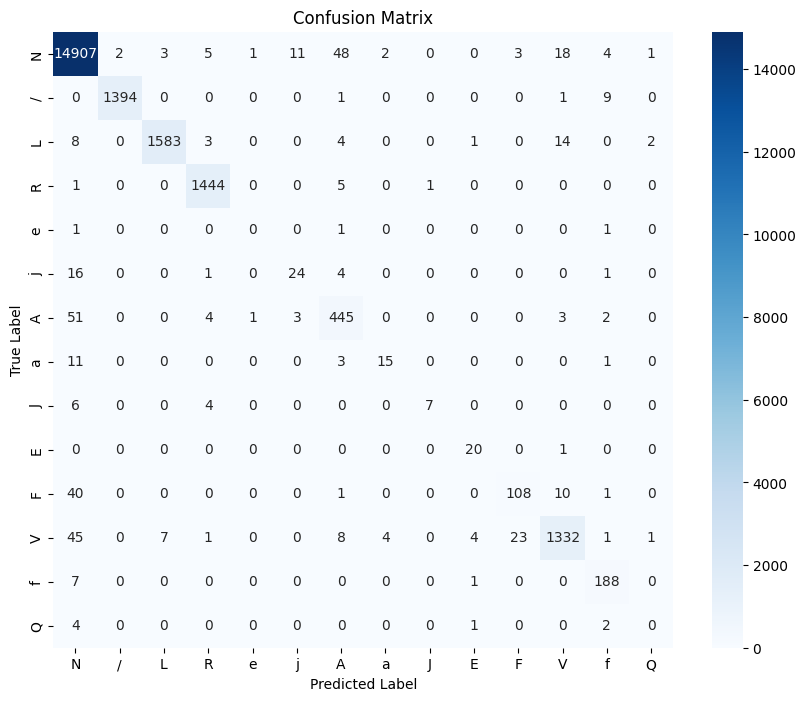

Hyperparameters:
Input Size: 250
Hidden Layer Size: 64
Number of Output Classes: 14
Learning Rate: 0.001
Number of Epochs: 20
Batch Size: 32
Total number of parameters in the model: 11054

Optimizer Parameters:
Learning Rate: 0.001


In [ ]:
le_3 = LabelEncoder()
y_test_filtered_ordered = le_3.fit_transform(y_test_filtered)

X_test_tensor = torch.tensor(X_test_filtered_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_filtered_ordered, dtype=torch.long)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Test the model on the test set
model.eval()
test_loss = 0.0
correct = 0
total = 0
predicted_list = np.array([])
with torch.no_grad():
    for data, targets in test_loader:
        outputs = model(data)
        loss = criterion(outputs, targets)
        test_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)  # Get class with max score
        predicted_list = np.append(predicted_list, predicted.numpy())
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Loss: {test_loss/len(test_loader):.4f}, Test Accuracy: {test_accuracy:.2f}%')

# Convert predictions and true labels back to NumPy arrays
y_test_np = y_test_tensor.numpy()

# Map back labelencodings
y_test_np = le.inverse_transform(y_test_np)
predicted_list = le.inverse_transform(predicted_list.astype(int))

# Compute Precision, Recall, F1 Score, and Confusion Matrix
precision = precision_score(y_test_np, predicted_list, average='weighted')
recall = recall_score(y_test_np, predicted_list, average='weighted')
f1 = f1_score(y_test_np, predicted_list, average='weighted')

precision_macro = precision_score(y_test_np, predicted_list, average='macro')
recall_macro = recall_score(y_test_np, predicted_list, average='macro')
f1_macro = f1_score(y_test_np, predicted_list, average='macro')

# Print evaluation metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print(f"precision_macro: {precision_macro:.4f}")
print(f"recall_macro: {recall_macro:.4f}")
print(f"f1_macro Score: {f1_macro:.4f}")
print(classification_report(y_test_np, predicted_list))

# Create and display the confusion matrix
conf_matrix = confusion_matrix(y_test_np, predicted_list)

# convert to letters
num_to_class = {0: 'N', 1: '/', 2: 'L', 3: 'R', 4: 'e', 5: 'j', 6: 'A', 7: 'a',
                 8: 'J', 9: 'S', 10: 'E', 11: 'F', 12: 'V', 13: 'f', 14: 'Q'}
y_test_letters = [num_to_class.get(num, num) for num in np.unique(y_test_np)]

plt.figure(figsize=(10, 8))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_test_letters, yticklabels=y_test_letters)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print Hyperparameters
print("Hyperparameters:")
print(f"Input Size: {input_size}")
print(f"Hidden Layer Size: {hidden_size}")
print(f"Number of Output Classes: {num_classes}")
print(f"Learning Rate: {learning_rate}")
print(f"Number of Epochs: {num_epochs}")
print(f"Batch Size: {batch_size}")

# Calculate total number of parameters
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

# Print the total number of parameters
print(f"Total number of parameters in the model: {total_params}")

# Print Optimizer Parameters
print("\nOptimizer Parameters:")
for param_group in optimizer.param_groups:
    print(f"Learning Rate: {param_group['lr']}")

# MLP on PCA dataset

In [ ]:
# Hyperparameters
input_size = X_train_scaled.shape[1]  # Number of features
hidden_size = 256  # Number of neurons in the hidden layer
num_classes = 15  # Number of classes in multi-class classification
learning_rate = 0.001
num_epochs = 20
batch_size = 32

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_train, dtype=torch.float32)
y_tensor = torch.tensor(y_train, dtype=torch.long)

X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# Dataset and train/validation split
train_dataset = TensorDataset(X_tensor, y_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define the MLP model with a hidden layer and ReLU activation
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # Hidden layer
        self.relu = nn.ReLU()  # ReLU activation function
        self.fc2 = nn.Linear(hidden_size, num_classes)  # Output layer

    def forward(self, x):
        out = self.fc1(x)  # Apply the first layer
        out = self.relu(out)  # Apply ReLU activation
        out = self.fc2(out)  # Apply the output layer
        return out

# Initialize model, loss function, and optimizer
model = SimpleMLP(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for data, targets in train_loader:
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, targets in val_loader:
            outputs = model(data)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)  # Get class with max score
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    accuracy = 100 * correct / total
    print(f'Validation Loss: {val_loss/len(val_loader):.4f}, Accuracy: {accuracy:.2f}%')

print("Training Complete.")


# CNN Marlon

In [ ]:
# Assuming X_train, X_val, X_test, y_train, y_val, y_test are your datasets
# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).unsqueeze(1)  # Add channel dimension (N, 1, 250)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for train, validation, and test sets
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# CNN Model Definition
class ECGCNN(nn.Module):
    def __init__(self):
        super(ECGCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 62, 128)  # Adjust the size based on the feature map size
        self.fc2 = nn.Linear(128, 15)  # Output layer for 15 classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # (N, 32, 250) -> (N, 32, 125)
        x = self.pool(torch.relu(self.conv2(x)))  # (N, 64, 125) -> (N, 64, 62)
        x = x.view(x.size(0), -1)  # Flatten (N, 64 * 62)
        x = torch.relu(self.fc1(x))  # Fully connected layer
        x = self.fc2(x)  # Output layer with 15 outputs (one per class)
        return x

# Initialize model, loss function, and optimizer
model = ECGCNN()
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the Model
def train(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validation after each epoch
        val_loss, val_acc = validate(model, val_loader, criterion)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

# Validation Function
def validate(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return val_loss / len(val_loader), correct / total

# Testing the Model
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Test Accuracy: {correct / total:.4f}")

# Run the training and evaluation
train(model, train_loader, val_loader, criterion, optimizer, num_epochs=20)
test(model, test_loader)

KeyboardInterrupt: 